In [2]:
import torch
from transformers import PreTrainedModel, PretrainedConfig
from transformers import BlipProcessor, BlipForImageTextRetrieval

processor = BlipProcessor.from_pretrained("Salesforce/blip-itm-base-coco")
raw_blip = BlipForImageTextRetrieval.from_pretrained("Salesforce/blip-itm-base-coco", torch_dtype=torch.float16)

In [18]:
raw_blip = raw_blip.to("cuda")

In [3]:
from datasets import load_dataset

ds = load_dataset("weathon/score_comparsion")

README.md:   0%|          | 0.00/771 [00:00<?, ?B/s]

data/train-00000-of-00003.parquet:   0%|          | 0.00/360M [00:00<?, ?B/s]

data/train-00001-of-00003.parquet:   0%|          | 0.00/362M [00:00<?, ?B/s]

data/train-00002-of-00003.parquet:   0%|          | 0.00/355M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/441 [00:00<?, ? examples/s]

In [22]:
def blip_score(image, text):
    inputs = processor(images=image, text=text, return_tensors="pt").to("cuda", torch.float16)
    with torch.no_grad():
        outputs = raw_blip(**inputs)
        logits_per_image = outputs[0]
        probs = logits_per_image.softmax(dim=1)
    return float(probs[0][0])

In [36]:
import json 

with open("prompts.json", "r") as f:
    prompts = json.load(f)

idx = 100
prompt_suffix = "; ".join([prompts[dim] for dim in ds["train"][idx]["dims"]])

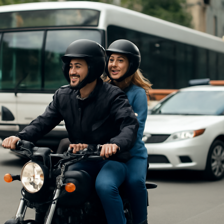

In [41]:
ds["train"][idx]["original_image"].resize((224, 224))

In [42]:
prompt = prompt_suffix
blip_score(ds["train"][idx]["distorted_image"], prompt), blip_score(ds["train"][idx]["original_image"], prompt)

(0.9658203125, 0.9169921875)